In [9]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

In [10]:
np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
input_shape = (1, IMG_ROWS, IMG_COLS)

In [17]:
# data: shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")

# consider them as float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
x_train = x_train[:, np.newaxis, :, :]
x_test = x_test[:, np.newaxis, :, :]

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


print(x_train.shape)

(60000, 'train samples')
(10000, 'test samples')
(60000, 1, 28, 28)


In [18]:
model = Sequential()
#CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# CONV => RELU => POOL
model.add(Conv2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# a softmax classifier
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))

In [13]:
# initialize the optimizer and model
#model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

print(x_train.shape)
print(y_train.shape)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

(60000, 1, 28, 28)
(60000, 10)
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 210s 4ms/step - loss: 0.1824 - acc: 0.9441 - val_loss: 0.0631 - val_acc: 0.9802
Epoch 2/10
48000/48000 [==============================] - 221s 5ms/step - loss: 0.0518 - acc: 0.9844 - val_loss: 0.0481 - val_acc: 0.9850
Epoch 3/10
48000/48000 [==============================] - 213s 4ms/step - loss: 0.0342 - acc: 0.9894 - val_loss: 0.0422 - val_acc: 0.9866
Epoch 4/10
48000/48000 [==============================] - 219s 5ms/step - loss: 0.0238 - acc: 0.9919 - val_loss: 0.0440 - val_acc: 0.9847
Epoch 5/10
48000/48000 [==============================] - 214s 4ms/step - loss: 0.0177 - acc: 0.9940 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 6/10
48000/48000 [==============================] - 218s 5ms/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.0339 - val_acc: 0.9900
Epoch 7/10
48000/48000 [==============================] - 210s 4ms/step - loss: 0.0112 - ac

In [14]:
score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 23s 2ms/step
('\nTest score:', 0.03123832540251642)
('Test accuracy:', 0.9909)


['acc', 'loss', 'val_acc', 'val_loss']


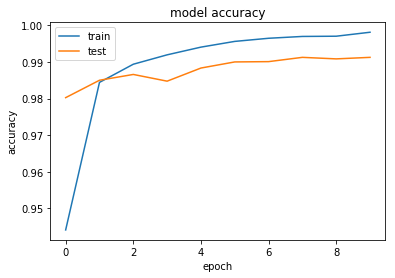

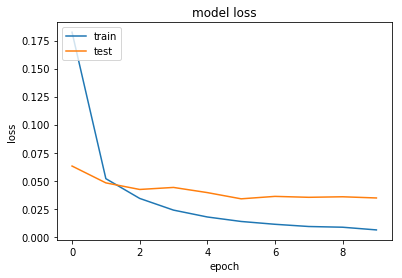

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
from keras.models import load_model
model.save('models/lenet_model.h5')  # creates a HDF5 file 'my_model.h5'
del model